In [78]:
# Step 1: Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


In [79]:
data = pd.read_csv(r'C:\Users\HP\Downloads\program files\python\framingham.csv')
data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [80]:
data.shape

(4240, 16)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [82]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [83]:
# Step 3: Data Preprocessing
# Handling missing values (filling with median)
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

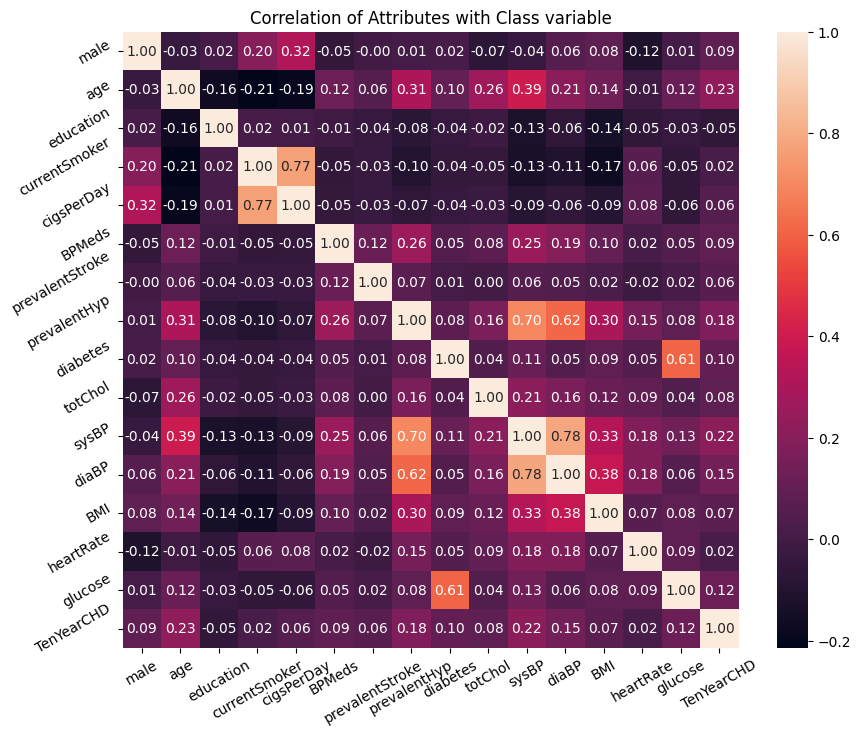

In [84]:
correlation = data.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [85]:
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

In [86]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [87]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [88]:

# Step 5: KNN Model and Hyperparameter Tuning
knn = KNeighborsClassifier()
k_values = list(range(1, 21))
grid = {'n_neighbors': k_values}


In [89]:
print(X_scaled.shape, y_train.shape)  # Debug shapes

(2544, 15) (2544,)


In [90]:

# Grid Search with Cross-Validation
grid_search = GridSearchCV(knn, grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f'Best K value: {best_k}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best K value: 16


In [91]:
# Step 6: Model Evaluation - Validation Set
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_val_pred = knn_best.predict(X_val)


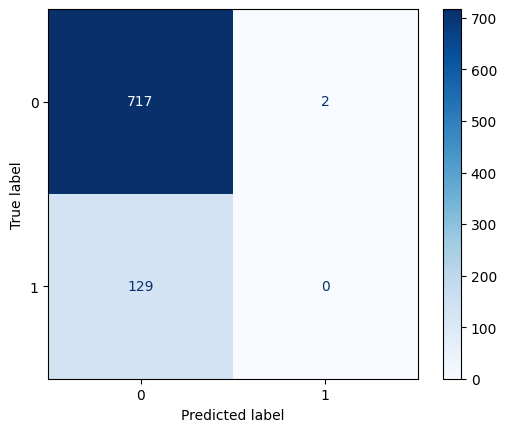

Validation Set Performance:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       0.00      0.00      0.00       129

    accuracy                           0.85       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.72      0.85      0.78       848



In [92]:
# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.show()
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

In [93]:
cv_scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')
average_cv_accuracy = cv_scores.mean()
print(f'Cross-Validation Average Accuracy: {average_cv_accuracy:.4f}')

Cross-Validation Average Accuracy: 0.8491


In [94]:
# Comparing Validation, Cross-Validation, and Test Set Performance
validation_accuracy = accuracy_score(y_val, y_val_pred)
y_test_pred = knn_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nComparison of Model Performance:")
print(f"Validation Set Accuracy: {validation_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Cross-Validation Average Accuracy: {average_cv_accuracy:.4f}")



Comparison of Model Performance:
Validation Set Accuracy: 0.8455
Test Set Accuracy: 0.8491
Cross-Validation Average Accuracy: 0.8491


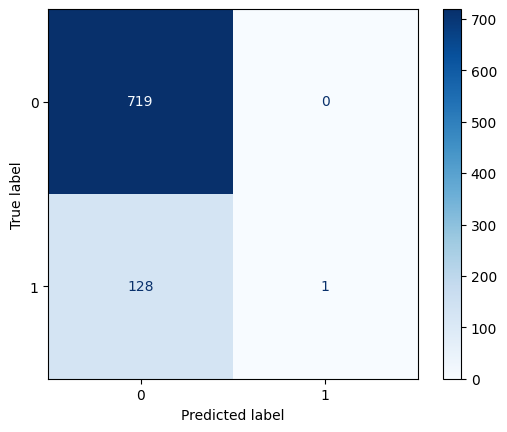

In [95]:
# Step 8: Final Model Evaluation on Test Set
y_test_pred = knn_best.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_matrix_test).plot(cmap='Blues')
plt.show()

In [96]:

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Test Set Performance:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       1.00      0.01      0.02       129

    accuracy                           0.85       848
   macro avg       0.92      0.50      0.47       848
weighted avg       0.87      0.85      0.78       848



In [97]:
# Step 9: Overfitting Discussion
train_accuracy = knn_best.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nOverfitting Analysis:")
print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.05:
    print("Model may be overfitting. Consider increasing K or feature selection.")



Overfitting Analysis:
Training Set Accuracy: 0.8506
Test Set Accuracy: 0.8491


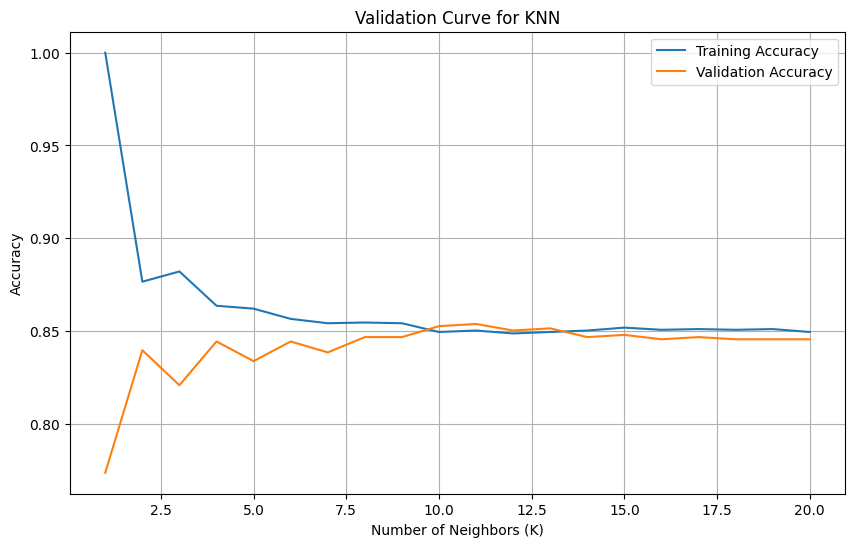

In [98]:

# Step 10: Visualization of Validation Curve
train_scores = []
val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    val_scores.append(knn.score(X_val, y_val))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Training Accuracy')
plt.plot(k_values, val_scores, label='Validation Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('Validation Curve for KNN')
plt.legend()
plt.grid(True)
plt.show()
